# Laboration deep learning AI21
## 0. EDA och filhantering

In [205]:
import os as os
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
import shutil

### a och c

In [252]:
current_dir = os.path.abspath("")

# Byt namn på orginaldatan
try:
    os.rename("Ny  mapp", "original_data")
except FileNotFoundError:
    pass
    
path_original_train = "original_data\\train\\train\\"

# Skapa mappstruktur
data_mappar = ["experiment_small_data", "experiment_tiny_data"]
undermappar = ["train", "val", "test"]

paths = [os.path.join(current_dir, os.path.join(m, u)) for m in data_mappar for u in undermappar]

for path in paths:
    os.makedirs(path, exist_ok=True)


In [7]:
paths

['c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_small_data\\train',
 'c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_small_data\\val',
 'c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_small_data\\test',
 'c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_tiny_data\\train',
 'c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_tiny_data\\val',
 'c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_tiny_data\\test']

### b


In [236]:

original_data_train = np.array(os.listdir(path_original_train))
original_data_test = np.array(os.listdir(path_original_train))


In [161]:
urvalsbilder = original_data_train.copy()
rnd.seed(22) # random verkar föredra hundar 🙀
rnd.shuffle(urvalsbilder)

urvalsbilder

array(['cat.1490.jpg', 'cat.9336.jpg', 'dog.2110.jpg', ...,
       'cat.10693.jpg', 'cat.5903.jpg', 'cat.2888.jpg'], dtype='<U13')

In [280]:
def plot_urval(bilder, mapp):
        
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(20,15)

    for bild, ax in zip(bilder, axes.flatten()):
        
        label = bild[:3]

        path = os.path.join(mapp, bild)

        img = plt.imread(path)

        ax.imshow(img)
        ax.set_title(label)    
        ax.axis("off")


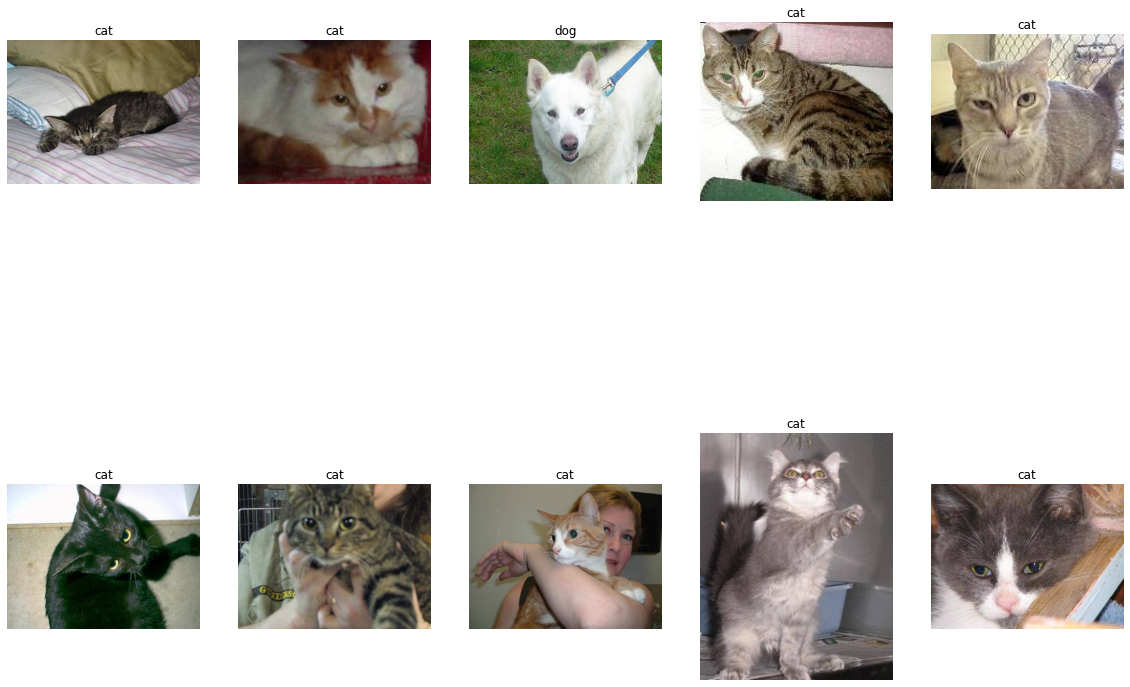

In [281]:
plot_urval(urvalsbilder, path_original_train)

### d

In [166]:
# Kontroll om några bilder har en annan etikett än katt eller hund
if sum([bild[:3] == "cat" or  bild[:3] == "dog" for bild in original_data_train]) == len(original_data_train):
    print("Alla etiketter är katt eller hund")
else:
    print("Det finns andra etiketter än hund och katt")



Alla etiketter är katt eller hund


In [256]:
def etiketter(fil_namn):
    return  np.array([bild[:3] for bild in fil_namn])


In [258]:

idx_katter = np.where(etiketter(original_data_train) == "cat")[0]
idx_hundar = np.where(etiketter(original_data_train) == "dog")[0]

idx_katter, idx_hundar

In [172]:
katter = np.array(original_data_train)[idx_katter]
hundar = np.array(original_data_train)[idx_hundar]

rnd.shuffle(katter)
rnd.shuffle(hundar)


array(['cat.12424.jpg', 'cat.2916.jpg', 'cat.9514.jpg', ...,
       'cat.8067.jpg', 'cat.5364.jpg', 'cat.1811.jpg'], dtype='<U13')

In [245]:
def plocka_bilder(från_idx, till_idx, mål_mapp):
    
    lista = np.concatenate((katter[från_idx : till_idx], hundar[från_idx : till_idx]))
    rnd.shuffle(lista)

    for bild in lista:
        bild_väg = os.path.join(path_original_train, bild)
        shutil.copy(bild_väg, mål_mapp)
        



In [253]:
antal_train = 1600
antal_val = 400
antal_test = 500

apa =antal_train//2 # TODO hitta på bättre variabelnamn
bapa = apa + antal_val//2
capa = bapa + antal_test//2

plocka_bilder(0, apa, paths[0])    
plocka_bilder(apa, bapa, paths[1])
plocka_bilder(bapa, capa, paths[2])

### e

In [323]:
train_smal_filnamn = np.array(os.listdir(paths[0]))
rnd.shuffle(train_smal_filnamn)

val_smal_filnamn = np.array(os.listdir(paths[1]))
rnd.shuffle(val_smal_filnamn)

test_smal_filnamn = np.array(os.listdir(paths[2]))
rnd.shuffle(test_smal_filnamn)

train_smal_filnamn.shape, val_smal_filnamn.shape, test_smal_filnamn.shape

((1600,), (400,), (500,))

In [251]:
# Kontroll ingen bild kommit med flera gånger TODO skrota den här?

for pet in train_smal:
    for pet2 in val_smal:
        if pet == pet2:
            print("Dublett!")

    for pet3 in test_smal:
        if pet == pet3:
            print("Dublett!")

for pet in val_smal:
    for pet2 in test_smal:
        if pet == pet2:
            print("Dublett!")            
   

In [324]:
train_smal_filnamn

array(['dog.5001.jpg', 'cat.12472.jpg', 'cat.6360.jpg', ...,
       'dog.1123.jpg', 'cat.5659.jpg', 'cat.938.jpg'], dtype='<U13')

In [325]:
x_train_smal = [plt.imread(os.path.join(paths[0], filnamn)) for filnamn in train_smal_filnamn]
x_val_smal = [plt.imread(os.path.join(paths[1], filnamn)) for filnamn in val_smal_filnamn]
x_test_smal = [plt.imread(os.path.join(paths[2], filnamn)) for filnamn in test_smal_filnamn]

In [326]:
# Utred vilka som är fina katter och byrackor
y_train_smal = np.array(etiketter(train_smal_filnamn) == "cat", dtype=np.int8)
y_val_smal = np.array(etiketter(val_smal_filnamn) == "cat", dtype=np.int8)
y_test_smal = np.array(etiketter(test_smal_filnamn) == "cat", dtype=np.int8)


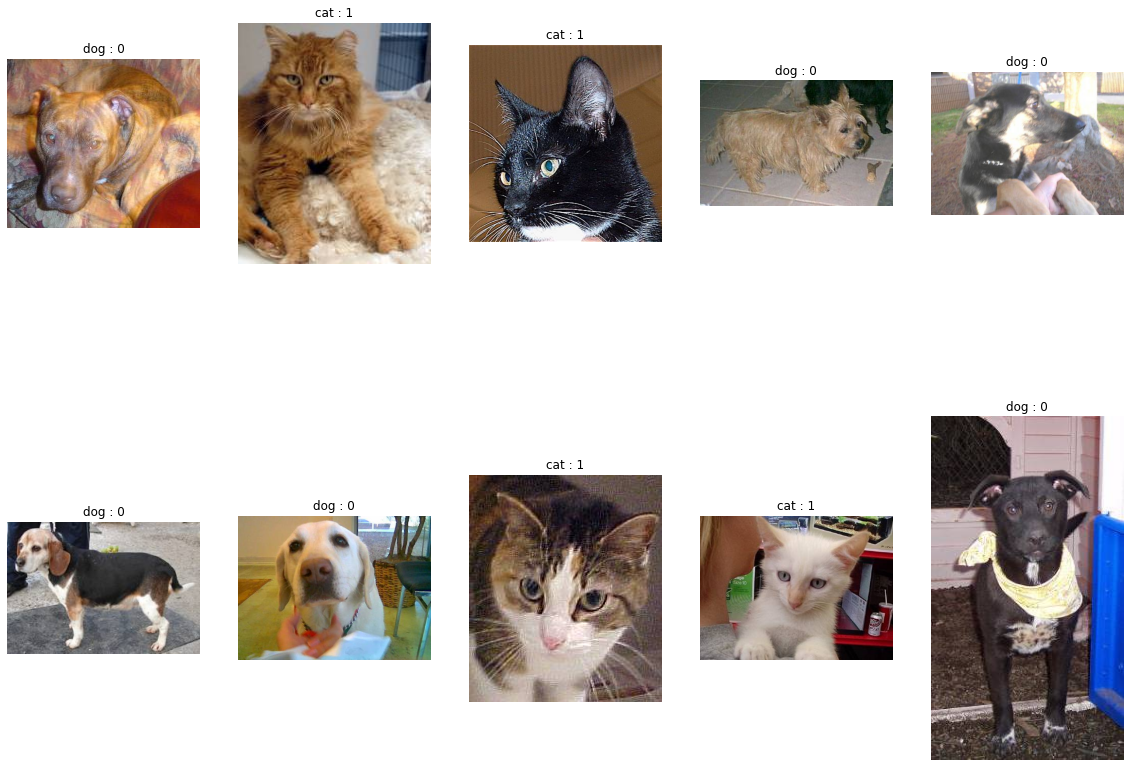

In [327]:
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(20,15)

for bild, x, y, ax in zip(train_smal_filnamn, x_train_smal, y_train_smal, axes.flatten()):
    
    label = bild[:3]

    ax.imshow(x)
    ax.set_title(f"{label} : {y}")    
    ax.axis("off")

Slumpade och rätt etikett. VSV


Text(0.5, 0.98, 'Cat vs Dogs')

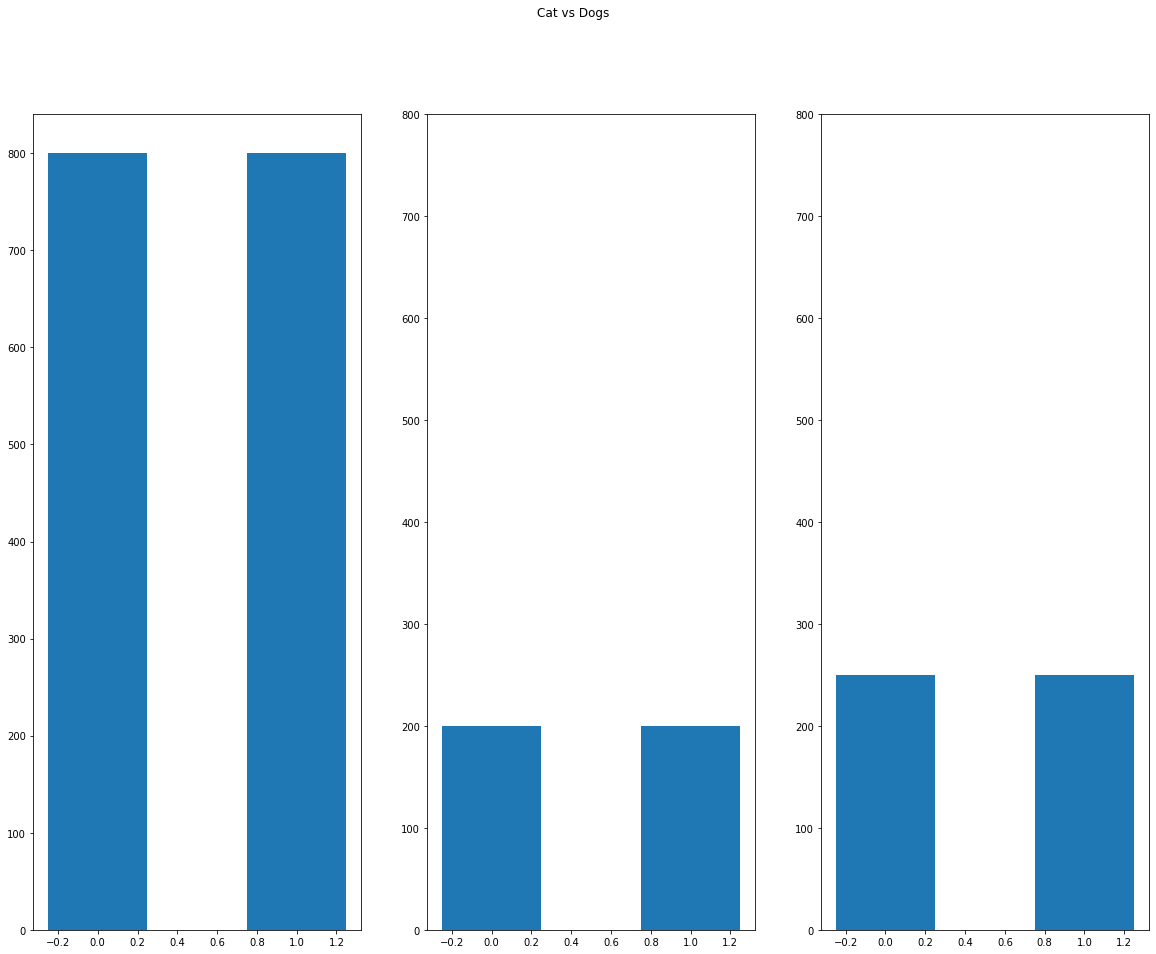

In [356]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(20,15)

axes[0].hist(y_train_smal, bins= [0, 0.5, 1, 1.5], align="left")

axes[1].hist(y_val_smal, bins= [0, 0.5, 1, 1.5], align="left")
axes[1].set_ylim(0, 800)
axes[2].hist(y_test_smal, bins= [0, 0.5, 1, 1.5], align="left")
axes[2].set_ylim(0, 800)

fig.suptitle("Cat vs Dogs")

Lika många bilder märkta som katt och hund i alla dataset. VSV.

Alla bilder behöver inte ha rätt etikett dock.